In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import tree

In [2]:
df = pd.read_csv('D:\MLRS\Data Mining & Predictive Analytics_Classes_2017-18\DMPA_Data for association rule\market basket.csv')
df

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,39808,42.7123,CHEQUE,M,NO,27000,46,F,T,T,F,F,F,F,F,F,F,T
1,67362,25.3567,CASH,F,NO,30000,28,F,T,F,F,F,F,F,F,F,F,T
2,10872,20.6176,CASH,M,NO,13200,36,F,F,F,T,F,T,T,F,F,T,F
3,26748,23.6883,CARD,F,NO,12200,26,F,F,T,F,F,F,F,T,F,F,F
4,91609,18.8133,CARD,M,YES,11000,24,F,F,F,F,F,F,F,F,F,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31384,37.2056,CARD,M,NO,27500,27,F,F,F,T,F,F,F,F,F,F,F
996,63996,13.7353,CHEQUE,F,NO,22600,23,F,F,F,T,F,F,F,F,F,T,F
997,99025,29.0798,CARD,M,YES,27400,42,F,T,F,F,F,F,F,F,F,F,F
998,95921,34.8576,CASH,F,YES,23300,43,T,F,F,F,F,F,F,T,F,F,T


In [3]:
import numpy as np
df['Target'] = np.where((df.cannedveg == 'T') & (df.beer == 'T') & (df.frozenmeal =='T'), 1, 0)
df

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery,Target
0,39808,42.7123,CHEQUE,M,NO,27000,46,F,T,T,F,F,F,F,F,F,F,T,0
1,67362,25.3567,CASH,F,NO,30000,28,F,T,F,F,F,F,F,F,F,F,T,0
2,10872,20.6176,CASH,M,NO,13200,36,F,F,F,T,F,T,T,F,F,T,F,1
3,26748,23.6883,CARD,F,NO,12200,26,F,F,T,F,F,F,F,T,F,F,F,0
4,91609,18.8133,CARD,M,YES,11000,24,F,F,F,F,F,F,F,F,F,F,F,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31384,37.2056,CARD,M,NO,27500,27,F,F,F,T,F,F,F,F,F,F,F,0
996,63996,13.7353,CHEQUE,F,NO,22600,23,F,F,F,T,F,F,F,F,F,T,F,0
997,99025,29.0798,CARD,M,YES,27400,42,F,T,F,F,F,F,F,F,F,F,F,0
998,95921,34.8576,CASH,F,YES,23300,43,T,F,F,F,F,F,F,T,F,F,T,0


In [4]:
# Checking class balance
df['Target'].value_counts()

0    854
1    146
Name: Target, dtype: int64

In [5]:
# Checking for Null Values
df.isna().any()

cardid           False
value            False
pmethod          False
sex              False
homeown          False
income           False
age              False
fruitveg         False
freshmeat        False
dairy            False
cannedveg        False
cannedmeat       False
frozenmeal       False
beer             False
wine             False
softdrink        False
fish             False
confectionery    False
Target           False
dtype: bool

In [6]:
X = df[['value', 'pmethod', 	'sex', 	'homeown', 	'income', 	'age','Target']]
X

,value,pmethod,sex,homeown,income,age,Target
0,42.7123,CHEQUE,M,NO,27000,46,0
1,25.3567,CASH,F,NO,30000,28,0
2,20.6176,CASH,M,NO,13200,36,1
3,23.6883,CARD,F,NO,12200,26,0
4,18.8133,CARD,M,YES,11000,24,0
...,...,...,...,...,...,...,...
995,37.2056,CARD,M,NO,27500,27,0
996,13.7353,CHEQUE,F,NO,22600,23,0
997,29.0798,CARD,M,YES,27400,42,0
998,34.8576,CASH,F,YES,23300,43,0


In [7]:
col2enc=X.select_dtypes(include=[object])
encoded_features = pd.get_dummies(col2enc)
encoded_features

,pmethod_CARD,pmethod_CASH,pmethod_CHEQUE,sex_F,sex_M,homeown_NO,homeown_YES
0,0,0,1,0,1,1,0
1,0,1,0,1,0,1,0
2,0,1,0,0,1,1,0
3,1,0,0,1,0,1,0
4,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...
995,1,0,0,0,1,1,0
996,0,0,1,1,0,1,0
997,1,0,0,0,1,0,1
998,0,1,0,1,0,0,1


In [8]:
numdata=X.select_dtypes(exclude=[object])
numdata

,value,income,age,Target
0,42.7123,27000,46,0
1,25.3567,30000,28,0
2,20.6176,13200,36,1
3,23.6883,12200,26,0
4,18.8133,11000,24,0
...,...,...,...,...
995,37.2056,27500,27,0
996,13.7353,22600,23,0
997,29.0798,27400,42,0
998,34.8576,23300,43,0


In [9]:
df = pd.concat([encoded_features,numdata,],axis = 'columns')
df

,pmethod_CARD,pmethod_CASH,pmethod_CHEQUE,sex_F,sex_M,homeown_NO,homeown_YES,value,income,age,Target
0,0,0,1,0,1,1,0,42.7123,27000,46,0
1,0,1,0,1,0,1,0,25.3567,30000,28,0
2,0,1,0,0,1,1,0,20.6176,13200,36,1
3,1,0,0,1,0,1,0,23.6883,12200,26,0
4,1,0,0,0,1,0,1,18.8133,11000,24,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,1,1,0,37.2056,27500,27,0
996,0,0,1,1,0,1,0,13.7353,22600,23,0
997,1,0,0,0,1,0,1,29.0798,27400,42,0
998,0,1,0,1,0,0,1,34.8576,23300,43,0


In [10]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1] , test_size = 0.2, random_state = 22,shuffle = True)

## Decision Tree Classification: Using Entropy

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       162
           1       0.92      0.95      0.94        38

    accuracy                           0.97       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.98      0.97      0.98       200



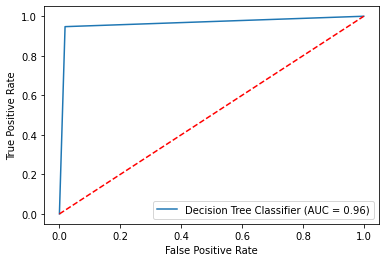

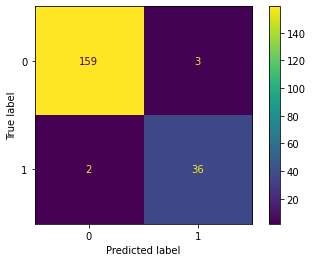

In [11]:
dtclf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state = 12)
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

[Text(3353.3653846153848, 3963.75, 'income <= 16950.0\nentropy = 0.571\nsamples = 800\nvalue = [692, 108]\nclass = 0'),
 Text(1788.4615384615386, 2831.25, 'sex_M <= 0.5\nentropy = 0.964\nsamples = 267\nvalue = [163, 104]\nclass = 0'),
 Text(894.2307692307693, 1698.75, 'income <= 10650.0\nentropy = 0.061\nsamples = 141\nvalue = [140, 1]\nclass = 0'),
 Text(447.11538461538464, 566.25, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1]\nclass = 0'),
 Text(1341.3461538461538, 566.25, 'entropy = 0.0\nsamples = 134\nvalue = [134, 0]\nclass = 0'),
 Text(2682.6923076923076, 1698.75, 'age <= 26.0\nentropy = 0.686\nsamples = 126\nvalue = [23, 103]\nclass = 1'),
 Text(2235.5769230769233, 566.25, 'entropy = 0.903\nsamples = 47\nvalue = [15, 32]\nclass = 1'),
 Text(3129.8076923076924, 566.25, 'entropy = 0.473\nsamples = 79\nvalue = [8, 71]\nclass = 1'),
 Text(4918.269230769231, 2831.25, 'pmethod_CARD <= 0.5\nentropy = 0.064\nsamples = 533\nvalue = [529, 4]\nclass = 0'),
 Text(4471.153846153847, 1698.75,

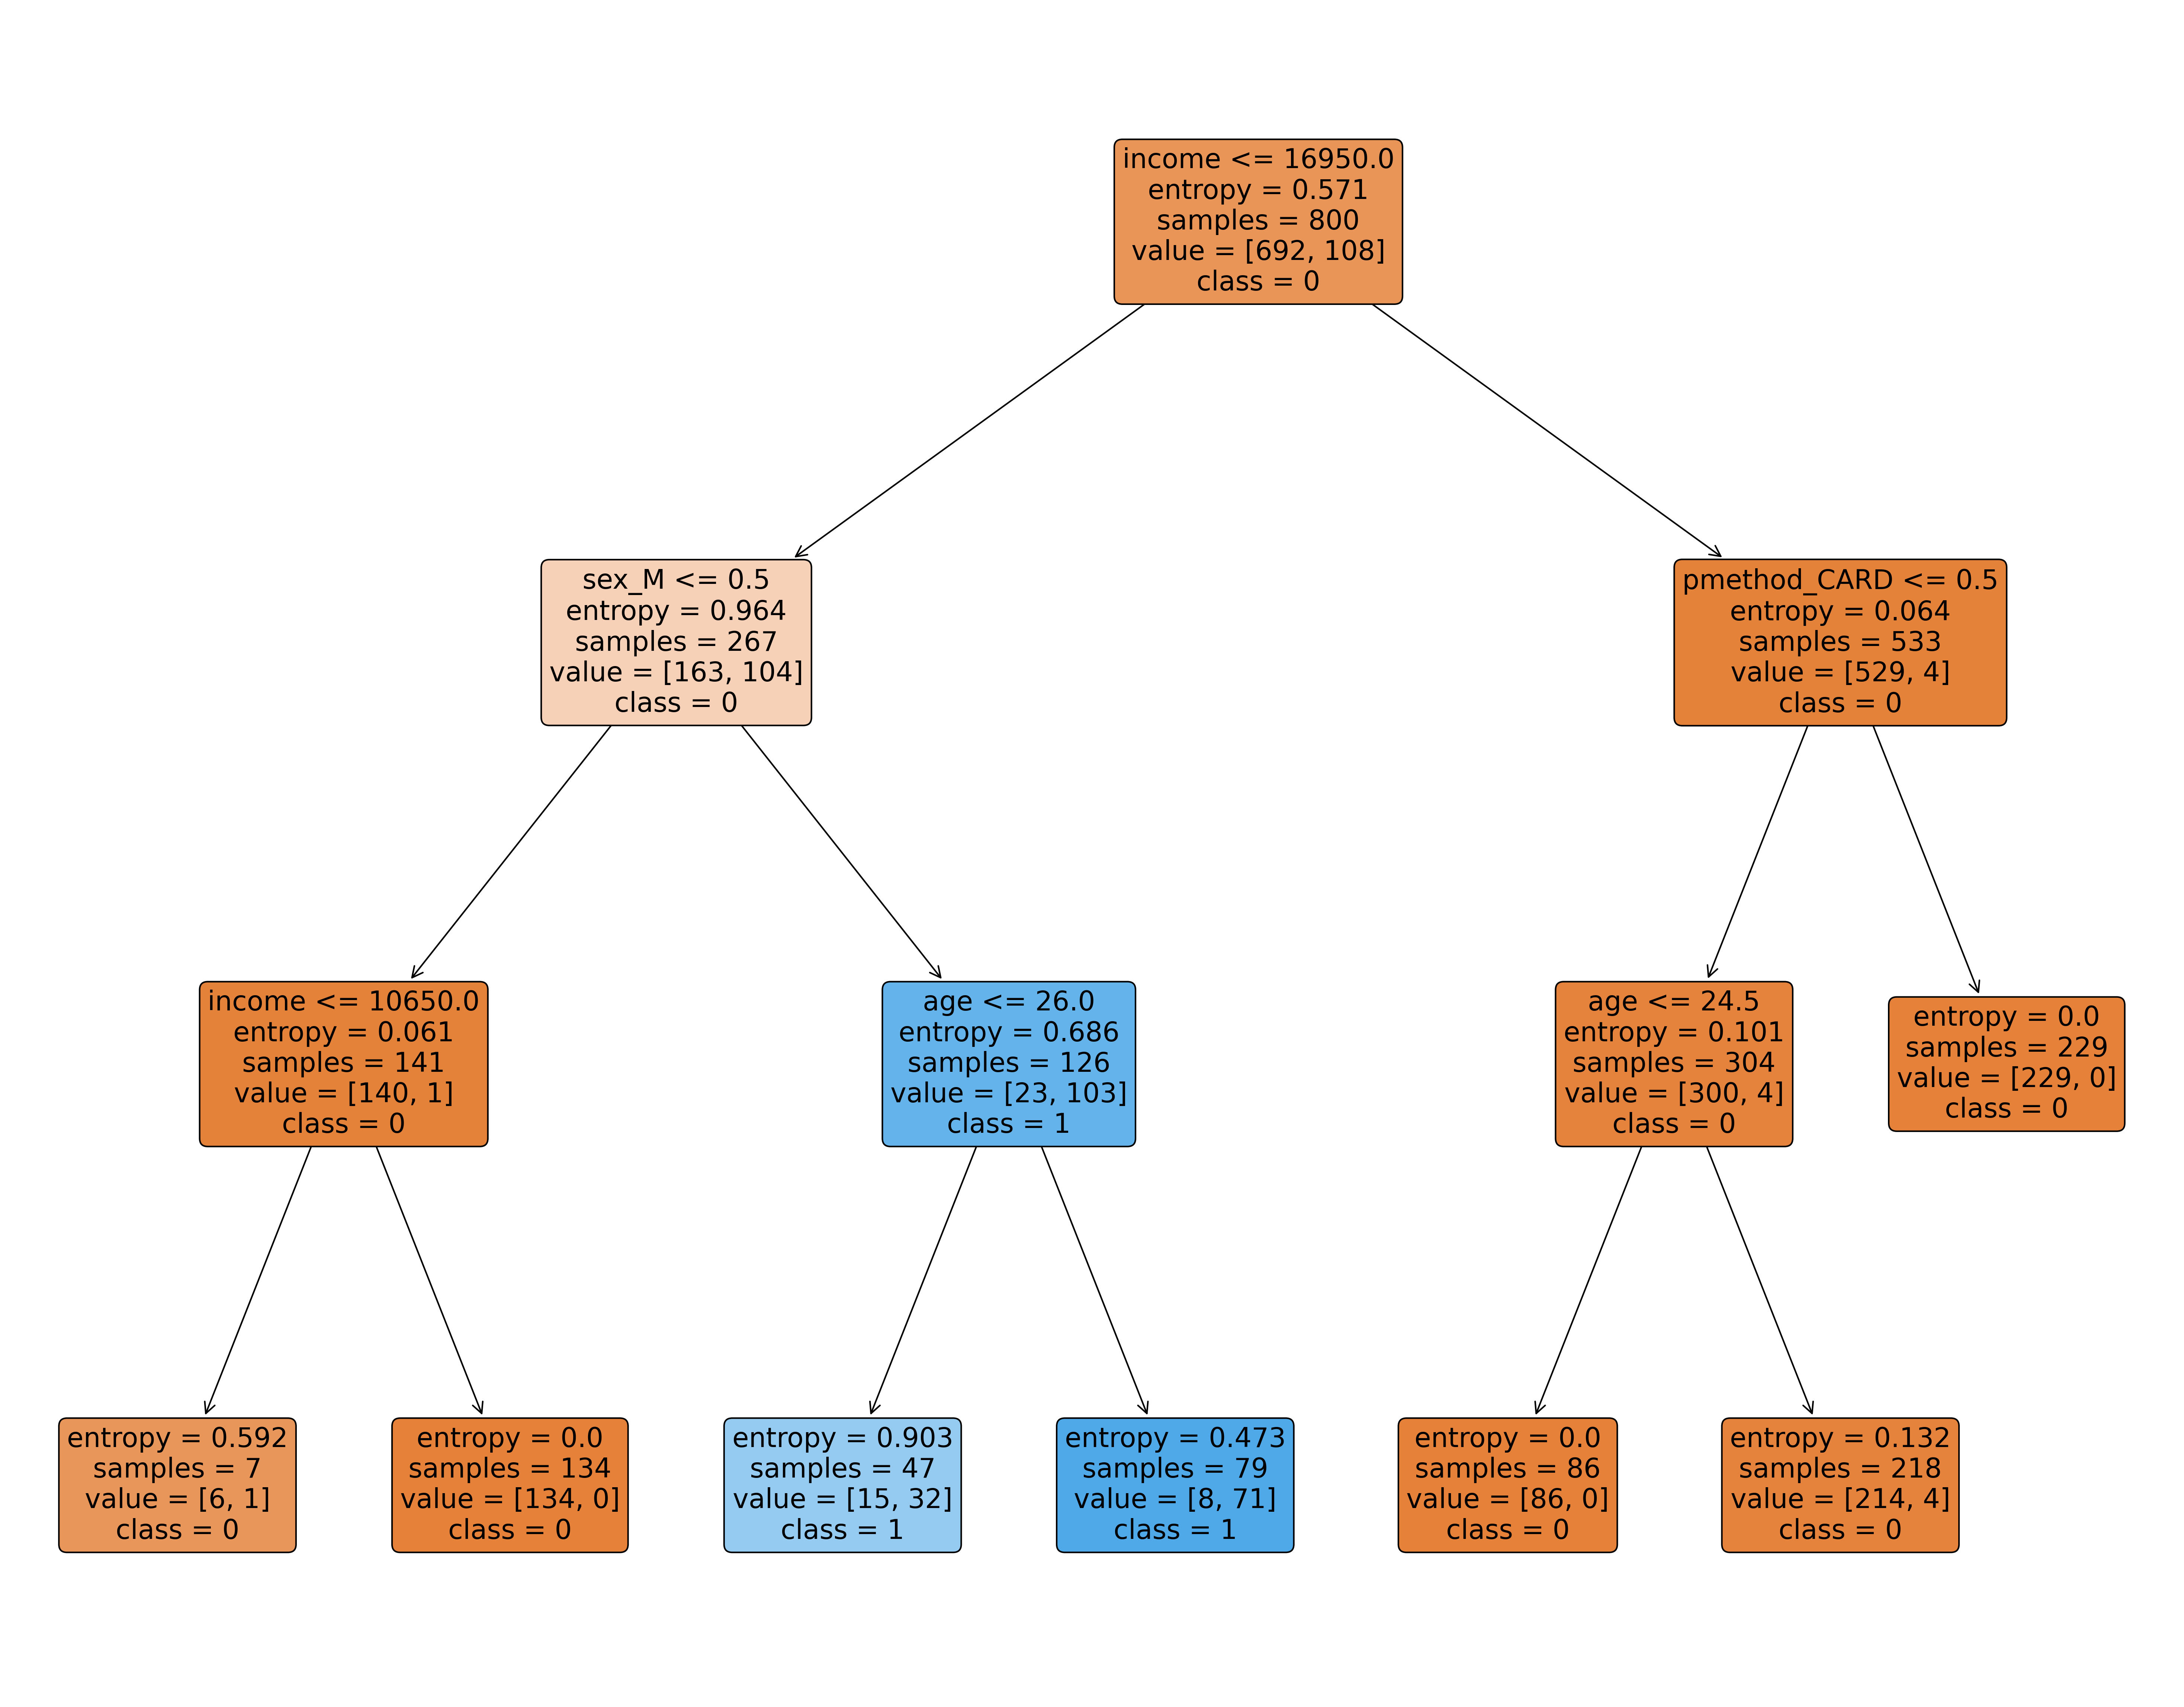

In [12]:
from sklearn import tree
#fig = plt.figure(figsize=(25,20))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,20), dpi=300)
tree.plot_tree(dtclf, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   rounded=True,
                   impurity = True,
                   filled=True)
#fig.savefig('DT.jpeg',dpi=200)

## Decision Tree Classification: Using Gini

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       162
           1       0.92      0.95      0.94        38

    accuracy                           0.97       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.98      0.97      0.98       200



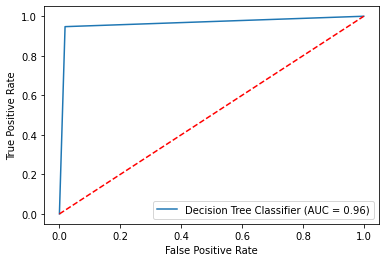

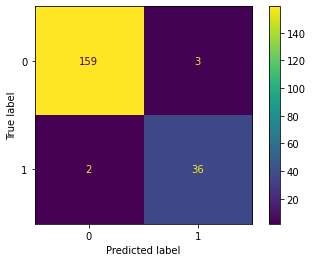

In [13]:
dtclf = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state = 12)
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

[Text(3353.3653846153848, 3963.75, 'income <= 16950.0\ngini = 0.234\nsamples = 800\nvalue = [692, 108]\nclass = 0'),
 Text(1788.4615384615386, 2831.25, 'sex_M <= 0.5\ngini = 0.476\nsamples = 267\nvalue = [163, 104]\nclass = 0'),
 Text(894.2307692307693, 1698.75, 'income <= 10650.0\ngini = 0.014\nsamples = 141\nvalue = [140, 1]\nclass = 0'),
 Text(447.11538461538464, 566.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = 0'),
 Text(1341.3461538461538, 566.25, 'gini = 0.0\nsamples = 134\nvalue = [134, 0]\nclass = 0'),
 Text(2682.6923076923076, 1698.75, 'age <= 26.0\ngini = 0.298\nsamples = 126\nvalue = [23, 103]\nclass = 1'),
 Text(2235.5769230769233, 566.25, 'gini = 0.435\nsamples = 47\nvalue = [15, 32]\nclass = 1'),
 Text(3129.8076923076924, 566.25, 'gini = 0.182\nsamples = 79\nvalue = [8, 71]\nclass = 1'),
 Text(4918.269230769231, 2831.25, 'pmethod_CARD <= 0.5\ngini = 0.015\nsamples = 533\nvalue = [529, 4]\nclass = 0'),
 Text(4471.153846153847, 1698.75, 'value <= 16.666\ngini = 0

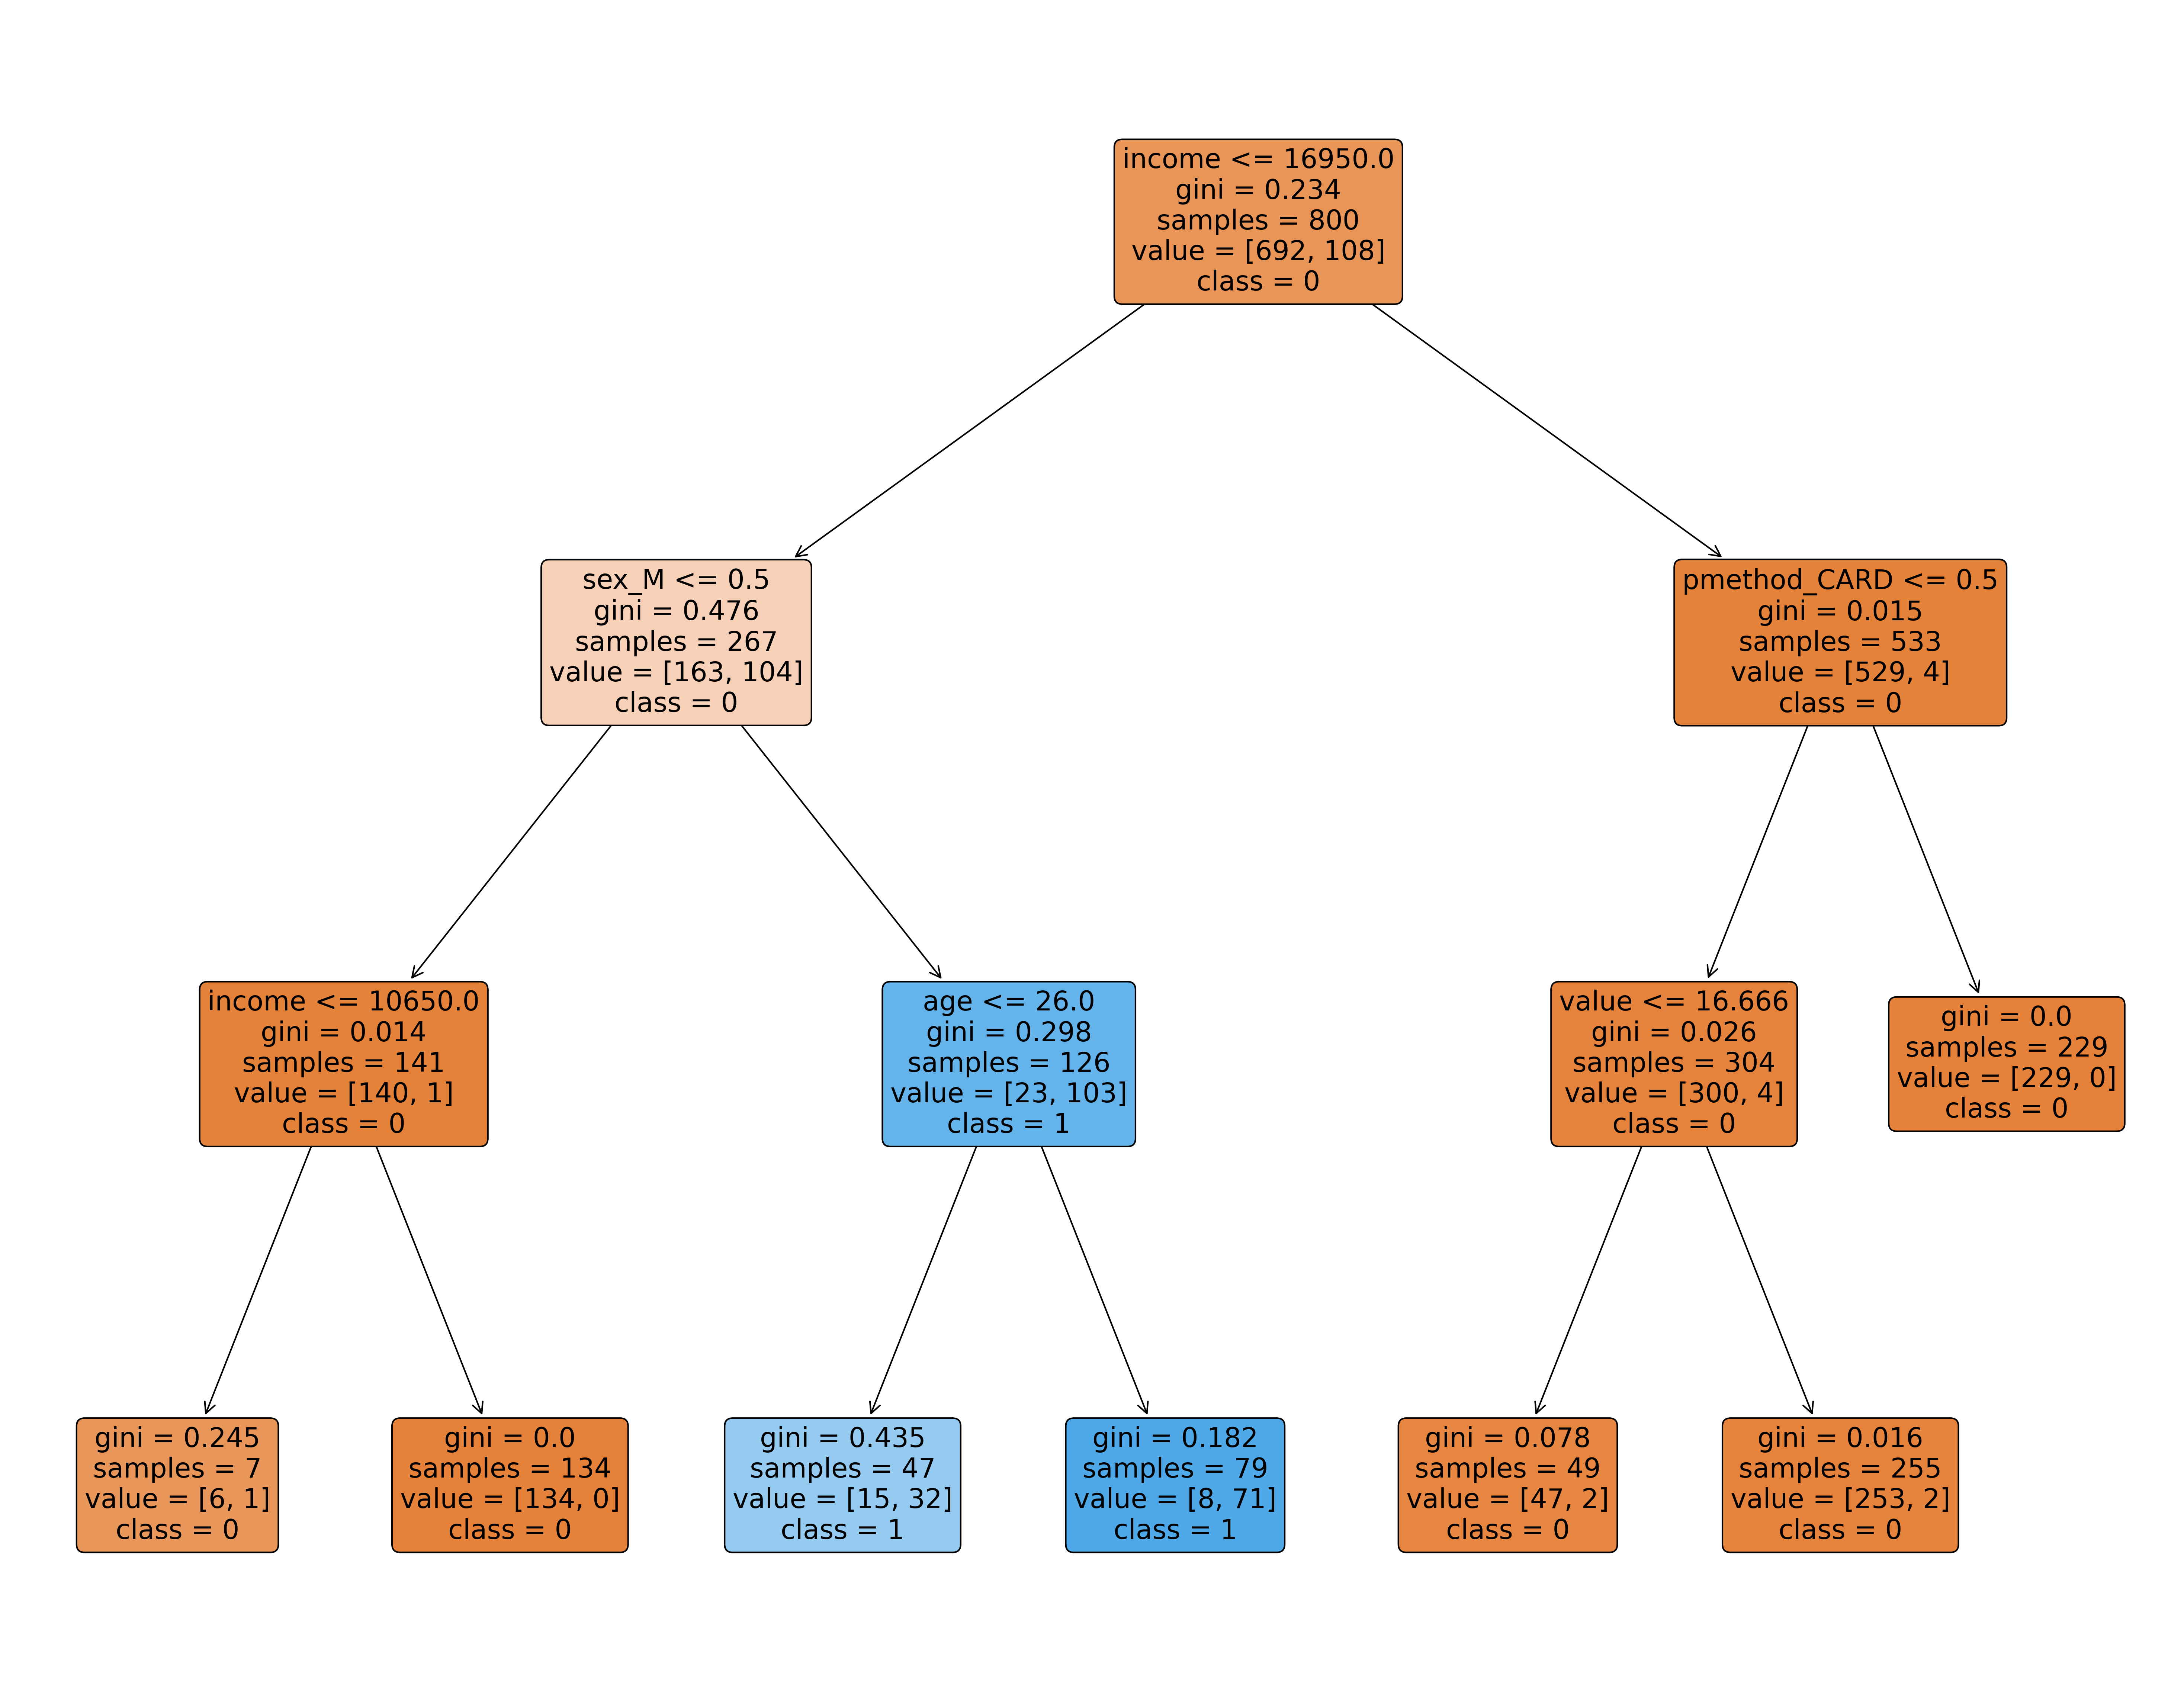

In [14]:
from sklearn import tree
#fig = plt.figure(figsize=(25,20))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,20), dpi=300)
tree.plot_tree(dtclf, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   rounded=True,
                   impurity = True,
                   filled=True)
#fig.savefig('DT.jpeg',dpi=200)

In [15]:
x1 = X_test.reset_index()
y1 = y_test.reset_index()
pred = pd.DataFrame(y_pred,columns = ['Predicted'])
result = pd.concat([x1,y1,pred],axis = 1)
result.drop(['index'],axis =1, inplace = True)
result.to_csv('Decision Tree Classifier.csv',index = False)
result

,pmethod_CARD,pmethod_CASH,pmethod_CHEQUE,sex_F,sex_M,homeown_NO,homeown_YES,value,income,age,Target,Predicted
0,1,0,0,1,0,0,1,37.7386,17000,22,0,0
1,0,1,0,1,0,1,0,11.5144,27600,48,0,0
2,0,0,1,0,1,0,1,26.5310,15100,40,1,1
3,1,0,0,1,0,0,1,41.2514,22600,38,0,0
4,1,0,0,1,0,0,1,26.6378,14100,37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,1,0,0,1,0,1,10.8367,17400,28,0,0
196,0,1,0,1,0,0,1,13.2005,17500,49,0,0
197,0,1,0,1,0,1,0,37.9016,20700,39,0,0
198,1,0,0,1,0,1,0,43.1953,19800,18,0,0


In [29]:
df.iloc[:,7:10]

,value,income,age
0,42.7123,27000,46
1,25.3567,30000,28
2,20.6176,13200,36
3,23.6883,12200,26
4,18.8133,11000,24
...,...,...,...
995,37.2056,27500,27
996,13.7353,22600,23
997,29.0798,27400,42
998,34.8576,23300,43


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,7:10] = scaler.fit_transform(df.iloc[:,7:10])
df

,pmethod_CARD,pmethod_CASH,pmethod_CHEQUE,sex_F,sex_M,homeown_NO,homeown_YES,value,income,age,Target
0,0,0,1,0,1,1,0,1.152774,1.184490,1.273020,0
1,0,1,0,1,0,1,0,-0.349929,1.704901,-0.468193,0
2,0,1,0,0,1,1,0,-0.760256,-1.209401,0.305680,1
3,1,0,0,1,0,1,0,-0.494385,-1.382871,-0.661661,0
4,1,0,0,0,1,0,1,-0.916478,-1.591035,-0.855129,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,1,1,0,0.675986,1.271225,-0.564927,0
996,0,0,1,1,0,1,0,-1.356147,0.421221,-0.951863,0
997,1,0,0,0,1,0,1,-0.027572,1.253878,0.886084,0
998,0,1,0,1,0,0,1,0.472689,0.542650,0.982818,0


In [17]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1] , test_size = 0.2, random_state = 22,shuffle = True)

## Artificial Neural Network Classifier

Epoch 1/10
80/80 [==============================] - 1s 1ms/step - loss: 0.6387 - accuracy: 0.8650
Epoch 2/10
80/80 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.8650
Epoch 3/10
80/80 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8650
Epoch 4/10
80/80 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8650
Epoch 5/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8650
Epoch 6/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2718 - accuracy: 0.8650
Epoch 7/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2420 - accuracy: 0.8650
Epoch 8/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.8650
Epoch 9/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2269 - accuracy: 0.8650
Epoch 10/10
80/80 [==============================] - 0s 944us/step - loss: 0.2284 - accuracy: 0.8650


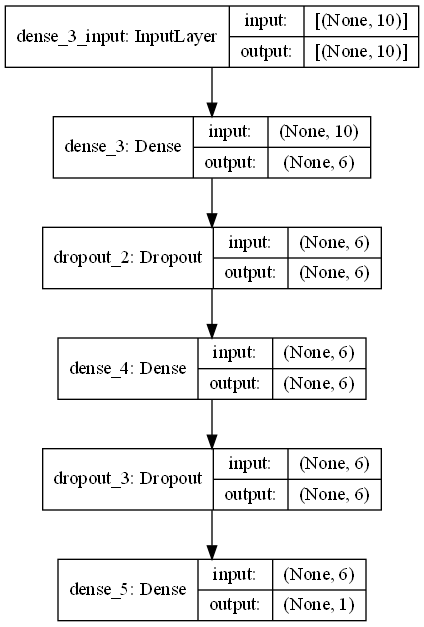

In [19]:
import tensorflow as tf  # install Tensorflow package [pip install tensorflow]
import keras # install Tensorflow package [pip install Keras]
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
tf.random.set_seed(124)
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6,kernel_initializer='uniform', activation = 'relu', input_dim = 10))
classifier.add(Dropout(rate = 0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 6,kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.2))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 66        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
import statistics as st
y_pred = classifier.predict(X_test)
y_pre = (y_pred>(st.median(y_pred)))

              precision    recall  f1-score   support

           0       0.99      0.61      0.76       162
           1       0.37      0.97      0.54        38

    accuracy                           0.68       200
   macro avg       0.68      0.79      0.65       200
weighted avg       0.87      0.68      0.71       200



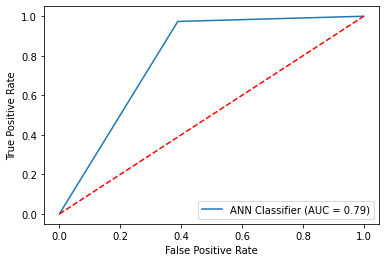

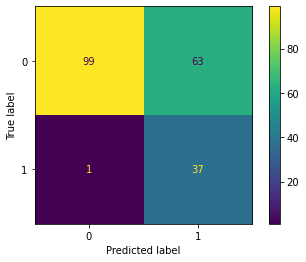

In [22]:
print(classification_report(y_test, y_pre))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pre,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ANN Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pre)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

In [24]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
x1 = X_test.reset_index()
y1 = y_test.reset_index()
y_pre = enc.fit_transform(y_pre)
pred = pd.DataFrame(y_pre,columns = ['Predicted'])
result = pd.concat([x1,y1,pred],axis = 1)
result.drop(['index'],axis =1, inplace = True)
result.to_csv('ANN Classifier.csv',index = False)
result

,pmethod_CARD,pmethod_CASH,pmethod_CHEQUE,sex_F,sex_M,homeown_NO,homeown_YES,value,income,age,Target,Predicted
0,1,0,0,1,0,0,1,0.722135,-0.550213,-1.048597,0,0.0
1,0,1,0,1,0,1,0,-1.548440,1.288572,1.466488,0,0.0
2,0,0,1,0,1,0,1,-0.248255,-0.879807,0.692616,1,1.0
3,1,0,0,1,0,0,1,1.026284,0.421221,0.499148,0,0.0
4,1,0,0,1,0,0,1,-0.239008,-1.053277,0.402414,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,1,0,0,1,0,1,-1.607117,-0.480825,-0.468193,0,1.0
196,0,1,0,1,0,0,1,-1.402452,-0.463478,1.563222,0,0.0
197,0,1,0,1,0,1,0,0.736248,0.091627,0.595882,0,0.0
198,1,0,0,1,0,1,0,1.194593,-0.064496,-1.435533,0,0.0
